In [26]:
import numpy as np
import pandas as pd
import feather

# read data from feather file
path = 'your path/small_dataset.feather'
impdf = feather.read_dataframe(path)
test_df = impdf.iloc[0:1000]
print('Data size', test_df.shape)

num_users, num_feature = test_df.shape
print('full data loaded')
print('number of users: ', num_users)
print('number of features: ', num_feature)
print(list(test_df))
print('--------------------------------------------------------------------------------')
print('number of not NaN elements in test dataset (%):', test_df.count()*100/num_users)

Data size (1000, 78)
full data loaded
number of users:  1000
number of features:  78
['sex', 'age', 'relation', 'home_town', 'city', 'has_mobile', 'has_photo', 'trending', 'verified', 'country', 'status', 'about', 'activities', 'books', 'games', 'interests', 'movies', 'music', 'quotes', 'tv', 'university_name', 'faculty_name', 'occupation_type', 'occupation_name', 'personal_political', 'personal_langs', 'personal_religion', 'personal_inspired_by', 'personal_people_main', 'personal_life_main', 'personal_smoking', 'personal_alcohol', 'albums', 'videos', 'audios', 'photos', 'notes', 'friends', 'groups', 'user_photos', 'followers', 'pages', 'gifts', 'subscriptions', 'Reposts', 'PostLikes', 'CommentLikes', 'Comments', 'Russia24', 'RussiaToday', 'Russia1', 'Culture', 'Channel1', 'RBK', 'TVCNews', 'MIR24', 'RIANews', 'Dozhd', 'NTV', 'Channel5', 'Apathetic', 'Communist', 'Conservative', 'Liberal', 'Libertarian', 'Moderate', 'Monarchist', 'Socialist', 'Ultraconservative', 'active_search', 'civi

In [27]:
#prepare a dataset with a part of available features (we are not interested in all the features)
feature_list = ['sex', 'age', 'has_mobile', 'has_photo', 'verified', 'albums', 'videos', 'audios', 'photos', 'notes', 'friends', 'followers', 'pages', 'subscriptions', 'PostLikes', 'CommentLikes', 'Comments', 'Russia24', 'RussiaToday', 'Russia1', 'Culture', 'Channel1', 'RBK', 'TVCNews', 'MIR24', 'RIANews', 'Dozhd', 'NTV', 'Channel5', 'Apathetic', 'Communist', 'Conservative', 'Liberal', 'Libertarian', 'Moderate', 'Monarchist', 'Socialist', 'Ultraconservative', 'active_search', 'civil_marriage', 'engaged', 'everything_difficult', 'have_friend', 'in_love', 'married', 'not_married', 'not_specified']

dataframe = test_df[feature_list]

X = dataframe.values

print(list(dataframe))
print('----------------------------')
print('number of not NaN elements in test datasets (%):', dataframe.count()*100/num_users)
print('Data size', X.shape)

['sex', 'age', 'has_mobile', 'has_photo', 'verified', 'albums', 'videos', 'audios', 'photos', 'notes', 'friends', 'followers', 'pages', 'subscriptions', 'PostLikes', 'CommentLikes', 'Comments', 'Russia24', 'RussiaToday', 'Russia1', 'Culture', 'Channel1', 'RBK', 'TVCNews', 'MIR24', 'RIANews', 'Dozhd', 'NTV', 'Channel5', 'Apathetic', 'Communist', 'Conservative', 'Liberal', 'Libertarian', 'Moderate', 'Monarchist', 'Socialist', 'Ultraconservative', 'active_search', 'civil_marriage', 'engaged', 'everything_difficult', 'have_friend', 'in_love', 'married', 'not_married', 'not_specified']
----------------------------
number of not NaN elements in test datasets (%): sex                     100.0
age                     100.0
has_mobile              100.0
has_photo               100.0
verified                100.0
albums                  100.0
videos                  100.0
audios                  100.0
photos                  100.0
notes                   100.0
friends                 100.0
foll

In [28]:
#normalize our data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

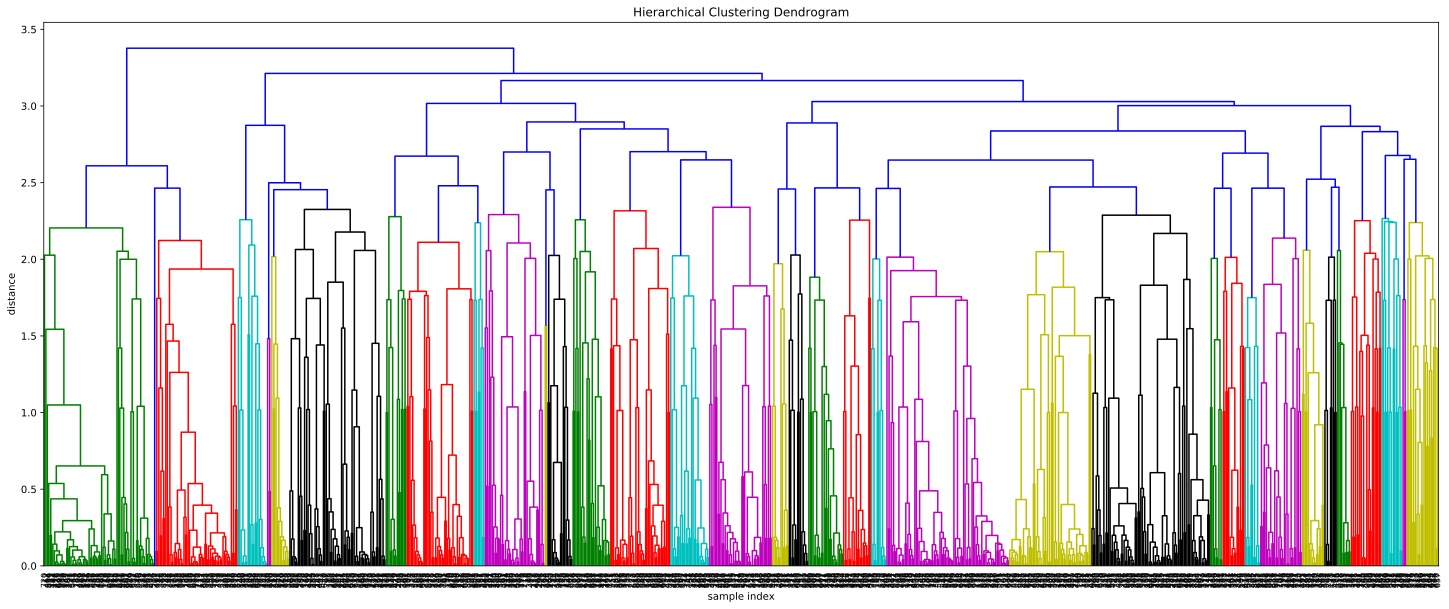

In [29]:
#Hierarchical clustering (generation of linkage matrix and dendrogram)
#One can skip this step and go to the next cell 
# Details can be found here:
# https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from pandas import DataFrame
import feather

# generate the linkage matrix
Z = linkage(x_scaled, 'complete')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()



#save Z as a dataframe 
df_Z = DataFrame.from_records(Z)

#write dataframe in a feather file
path = 'your path/small_dataset_matrixZ.feather'
feather.write_dataframe(df_Z, path)

In [30]:
# One can read matrix Z from the provided file (small_dataset_matrixZ.feather)

path = 'your path/small_dataset_matrixZ.feather'
df_Z1 = feather.read_dataframe(path)
Z1 = df_Z1.values
print(df_Z1.shape)


num_rows, num_feature = df_Z1.shape
print('full data loaded')
print('number of rows: ', num_rows)
my_size = num_rows


(999, 4)
full data loaded
number of rows:  999


In [31]:
from scipy.cluster.hierarchy import fcluster
import pandas
from collections import Counter
import matplotlib.pyplot as plot
import math

#consider 500 dendrogram cuts
dist_max = 3.5
num_steps =500
min_d = 0.001
clusters = []
diff = (dist_max-min_d)/4
Renyi_entropy = []
number_of_clusters = []
energy = []
Shannon = []
free_energy = []
num_clusters = 0
Tsallis_entropy = []
ratio = []
my_ratio = []
my_count = []
l = 0


dist_max = dist_max - (dist_max-min_d)/10

ald_cluster = 0
for i in range (num_steps+1):
    clusters = fcluster(Z1, dist_max, criterion='distance')
     
    #calculate the number of cluster for the current dendrogram cut
    num_clusters = max(clusters)
    ald_cluster = num_clusters
    
    number_of_clusters.append(num_clusters)
    l = l+1
    #calculate the number of elements in each cluster
    letter_counts = Counter(clusters)
    #convert Counter into list of values
    list_dict = list(letter_counts.values())
    
    prob = [] 
    probj = 0
    E1 = 0
    E = 0
    S = 0
    F = 0
    ratio = 0
    sumentropy = 0
    my_count1 = 0
    #loop for clusters of one level
    for j in range(len(list_dict)): 
        probj = list_dict[j]/my_size
        
        if probj > (1/my_size):
            E1 = E1+probj 
            ratio = ratio + list_dict[j]
            my_count1= my_count1+1

    my_ratio.append(ratio)   
    my_count.append(probj)
    
    #calculate Gibbs-Shannon entropy 
    my_rat = ratio/my_size
    if my_rat < 0.000001 : my_rat = 0.000001
    if my_rat > 1 : my_rat = 1
    S = math.log(my_rat) 
    Shannon.append(S)
    
    #calculate internal energy 
    my_e_rat = E1/num_clusters
    if my_e_rat < 0.000001 : my_e_rat = 0.000001
    if my_e_rat > 1 : my_e_rat = 0.999999
    E =  -math.log(my_e_rat) 
    energy.append(E)

    #calculate free energy
    F = E - num_clusters * S
    free_energy.append(F)
    
    #calculate Renyi entropy
    my_q = num_clusters - 1
    if my_q ==0 : Renyi = F / (num_clusters )
    if my_q > 0 : Renyi = F / (num_clusters - 1)      
    Renyi_entropy.append(Renyi)
    
    
    # choose the next denrogram cut
    dist_max = dist_max-diff
    diff = (dist_max-min_d)/20
    clusters = []
         


Text(0.5, 1.0, '')

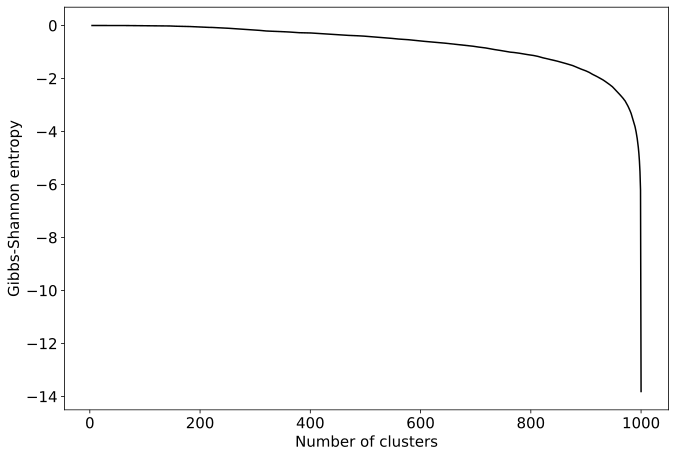

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()

axes_big = fig.add_axes([0.11, 0.1, 1.4, 1.4])

axes_big.plot(number_of_clusters, Shannon, 'black')
axes_big.set_xlabel('Number of clusters', fontdict={"fontsize": 15})
axes_big.tick_params(labelsize=15)
axes_big.set_ylabel('Gibbs-Shannon entropy', fontdict={"fontsize": 15})
axes_big.set_title('', fontdict={"fontsize": 52})


In [11]:
fig.savefig("Shannon.pdf", dpi=200, bbox_inches = "tight")

Text(0.5, 1.0, '')

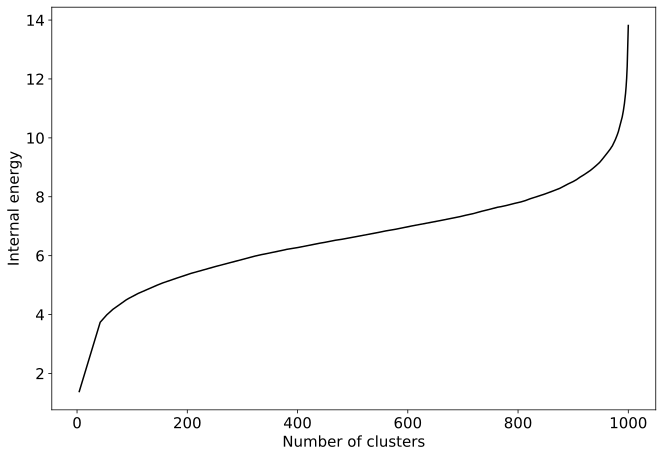

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
fig2 = plt.figure()

axes_big = fig2.add_axes([0.11, 0.1, 1.4, 1.4])

axes_big.plot(number_of_clusters, energy, 'black')
axes_big.set_xlabel('Number of clusters', fontdict={"fontsize": 15})
axes_big.tick_params(labelsize=15)
axes_big.set_ylabel('Internal energy', fontdict={"fontsize": 15})
axes_big.set_title('', fontdict={"fontsize": 52})

In [13]:
fig2.savefig("Internal_energy.pdf", dpi=200, bbox_inches = "tight")

Text(0.5, 1.0, '')

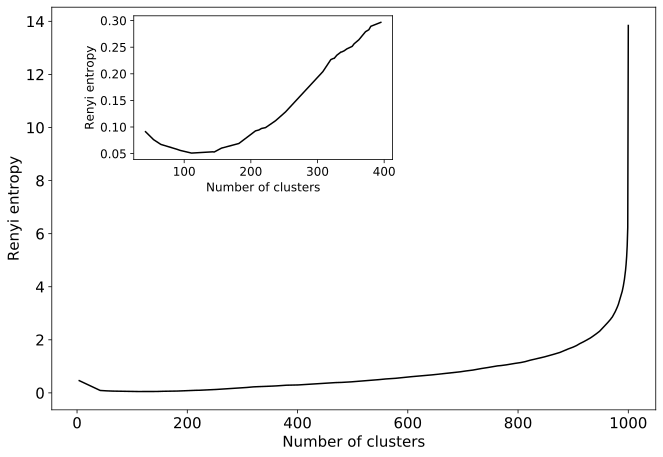

In [34]:
fig3 = plt.figure()
x_small = number_of_clusters[1:35]
y_small = Renyi_entropy[1:35]
axes_big3 = fig3.add_axes([0.11, 0.1, 1.4, 1.4])

axes_small3 = fig3.add_axes([0.3, 0.97, 0.6, 0.5])

axes_big3.plot(number_of_clusters, Renyi_entropy, 'black')

axes_big3.set_xlabel('Number of clusters', fontdict={"fontsize": 15})
axes_big3.tick_params(labelsize=15)
axes_big3.set_ylabel('Renyi entropy', fontdict={"fontsize": 15})
axes_big3.set_title('', fontdict={"fontsize": 52})

axes_small3.plot(x_small, y_small, 'black')


axes_small3.tick_params(labelsize=12)
axes_small3.set_xlabel('Number of clusters', fontdict={"fontsize": 12})
axes_small3.set_ylabel('Renyi entropy', fontdict={"fontsize": 12})
axes_small3.set_title('', fontdict={"fontsize": 12})


In [26]:
fig3.savefig("Renyi.pdf", dpi=200, bbox_inches = "tight")

In [22]:
import csv
from itertools import zip_longest
d = [number_of_clusters, energy, Shannon, free_energy, Renyi_entropy, Tsallis_entropy]
export_data = zip_longest(*d, fillvalue = '')
with open('Renyi_hierarchical_results.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Number of clusters", "Energy", "Shannon entropy", "free_energy", "Renyi entropy"))
      wr.writerows(export_data)
myfile.close()